### Q5: Total sales of Barisal in 2015

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

con = PostgresConnection().getConnection()

Successfully connected to the database


In [3]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  tim.month, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"WHERE tim.year='2015' AND s.division = 'BARISAL'" \
"GROUP BY CUBE(tim.month) "\
"ORDER BY tim.month "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Month', 'Sales'])
df['Sales'] = df['Sales'].astype('float64')
df['Month'] = df['Month'].astype('object')
df


Successfully connected to the database


,Month,Sales
0,1.0,86244.75
1,2.0,85857.50
2,3.0,99066.00
3,4.0,89232.75
4,5.0,92102.25
5,6.0,86506.50
6,7.0,92942.25
7,8.0,83922.50
8,9.0,90982.50
9,10.0,85341.00


C:\Users\Nayan\Desktop\myenv\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


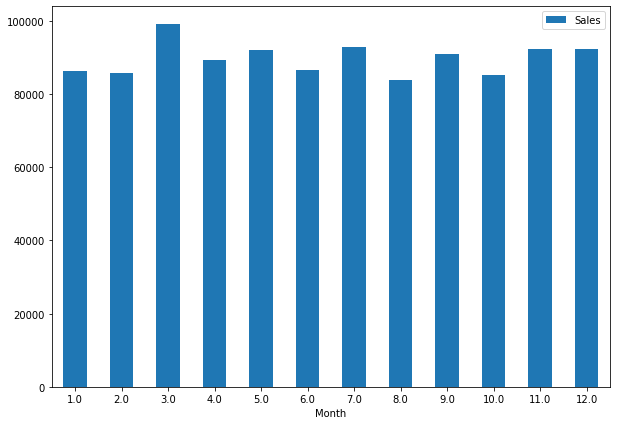

In [4]:
df = df.dropna()
fig = df.plot.bar(x='Month', y='Sales', figsize=(10,7), rot=0)

Text(0, 0.5, 'Total Sales in each month')

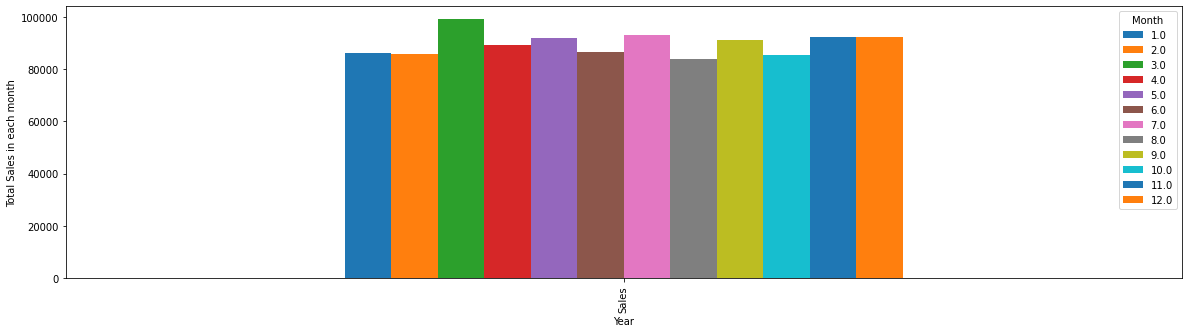

In [5]:
df_pivot = pd.pivot_table(df, values="Sales", columns="Month")

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(20, 5)

ax.set_xlabel("Year")
ax.set_ylabel("Total Sales in each month")


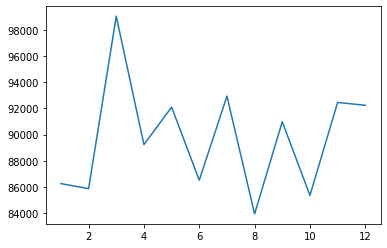

In [6]:
x = df.Month
y = df.Sales
plt.plot(x, y) 
plt.show() 

In [19]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT s.upazila, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"WHERE s.division = 'BARISAL'" \
"GROUP BY CUBE(s.upazila) "\
"ORDER BY s.upazila "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Upazila', 'Sales'])
# df['Sales'] = df['Sales'].astype('float64')
# df['Month'] = df['Month'].astype('object')
df = df.dropna()
df


Successfully connected to the database


,Upazila,Sales
0,AGAILJHARA,289810.75
1,AMTALI,141236.75
2,BABUGANJ,295610.75
3,BAKERGANJ,283902.75
4,BAMNA,141385.25
5,BANARI PARA,285898.50
6,BARGUNA SADAR,149544.50
7,BARISAL SADAR (KOTWALI),289540.25
8,BAUPHAL,144733.50
9,BETAGI,152944.25


Text(0, 0.5, 'Total Sales in each month')

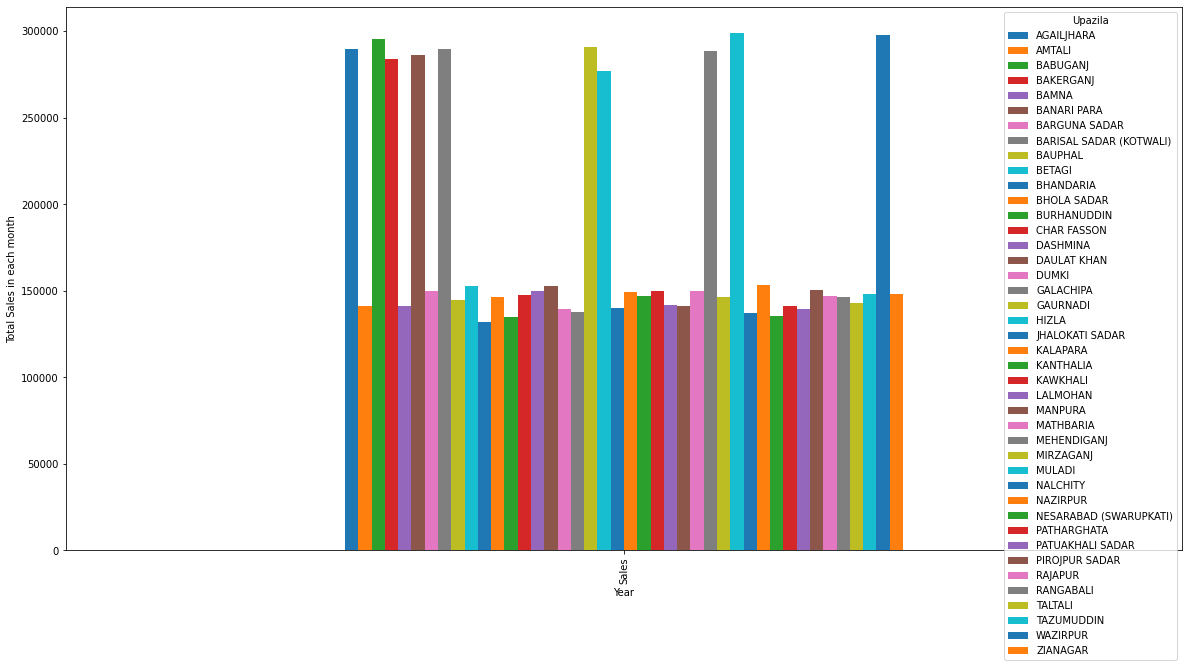

In [21]:
df_pivot = pd.pivot_table(df, values="Sales", columns="Upazila")

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(20, 10)

ax.set_xlabel("Year")
ax.set_ylabel("Total Sales in each month")


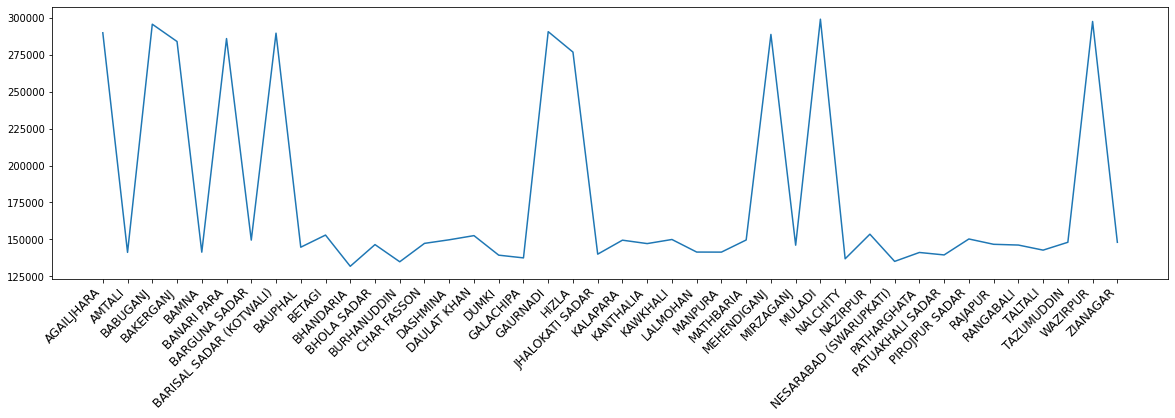

In [32]:
x = df.Upazila
y = df.Sales
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.xticks(color='black', rotation=45, fontsize='12', horizontalalignment='right')
plt.plot(x, y) 
plt.show() 